In [2]:
import os
import sys
import matplotlib.pyplot as plt

# Add the local src directory to the path
sys.path.append('./gbapy/')

# Load the GBA_model class
from GbaModel import *

In [23]:
create_gba_model(model_folder = "./csv_models/D", gba_path="./examples", save_LP = False, save_optimums = True)


> Computing optimums for model D...
> Gradient ascent: convergence reached (condition=1,	mu=2.2554,	nb iterations=4144,	nb fixed=4115)
> Gradient ascent: convergence reached (condition=2,	mu=2.25457,	nb iterations=3906,	nb fixed=3878)
> Gradient ascent: convergence reached (condition=3,	mu=2.25332,	nb iterations=3905,	nb fixed=3877)
> Gradient ascent: convergence reached (condition=4,	mu=2.25145,	nb iterations=3907,	nb fixed=3879)
> Gradient ascent: convergence reached (condition=5,	mu=2.24866,	nb iterations=3905,	nb fixed=3877)
> Gradient ascent: convergence reached (condition=6,	mu=2.24448,	nb iterations=3907,	nb fixed=3879)
> Gradient ascent: convergence reached (condition=7,	mu=2.23826,	nb iterations=3909,	nb fixed=3881)
> Gradient ascent: convergence reached (condition=8,	mu=2.22901,	nb iterations=3906,	nb fixed=3878)
> Gradient ascent: convergence reached (condition=9,	mu=2.21535,	nb iterations=3910,	nb fixed=3882)
> Gradient ascent: convergence reached (condition=10,	mu=2.19529,

In [3]:
model = load_gba_model("./examples/D.gba")


### Gradient ascent mu, v , c , p in one plot

### PLOT Gradient_Ascend for condition 1, p,v,c

In [25]:
model.clear_all_trajectories()

> Gradient ascent: convergence reached (condition=1,	mu=2.2554,	nb iterations=3882,	nb fixed=3857)


(True, 2.1980061531066895)

In [4]:
model.GA_tracker

""


> Gradient ascent: convergence reached (condition=1,	mu=2.2554,	nb iterations=3882,	nb fixed=3857)


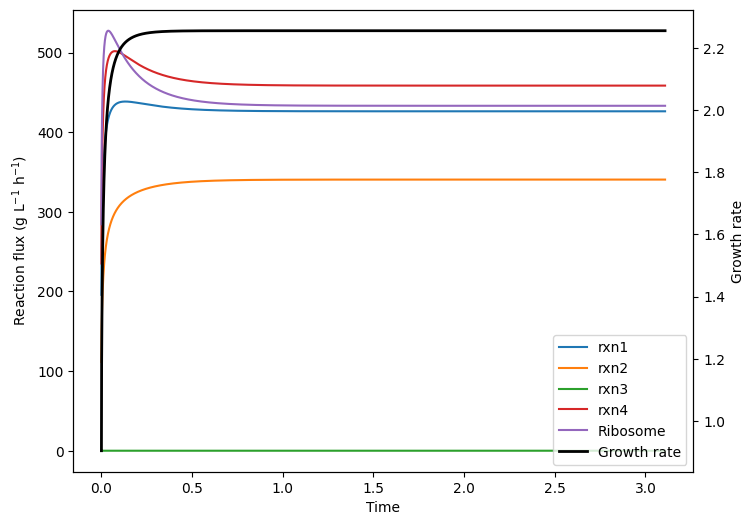

In [10]:
import matplotlib.pyplot as plt

# Clear previous trajectories and set up model
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.gradient_ascent(condition="1", initial_dt=0.0001, track=True, savedValues=["v"], label=1)

# Extract data
DfluxCon1 = model.GA_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time = model.GA_tracker["t"]
growthrate = model.GA_tracker["mu"]

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot reaction fluxes on the primary y-axis (left side)
for column in DfluxCon1:
    label = column.replace('.v', '')  # Remove ".v" from labels
    ax1.plot(time, DfluxCon1[column], label=label)

# Set labels for primary axis (reaction fluxes)
ax1.set_xlabel('Time')
ax1.set_ylabel(r'Reaction flux (g L$^{-1}$ h$^{-1}$)')
#ax1.set_title('Reaction fluxes and growth rate over time')

# Create a secondary y-axis for growth rate
ax2 = ax1.twinx()
ax2.plot(time, growthrate, label='Growth rate', color='black', linewidth=2)  # Red for growth rate

# Set label for secondary axis (growth rate)
ax2.set_ylabel('Growth rate', color='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right')

#save figure before showing
plt.savefig("GA_reaction_flux_growthrate_plot.png", dpi=300)
# Display the plot
plt.show()




### Gradient Ascent P vs Time

> Gradient ascent: convergence reached (condition=1,	mu=2.2554,	nb iterations=3882,	nb fixed=3857)


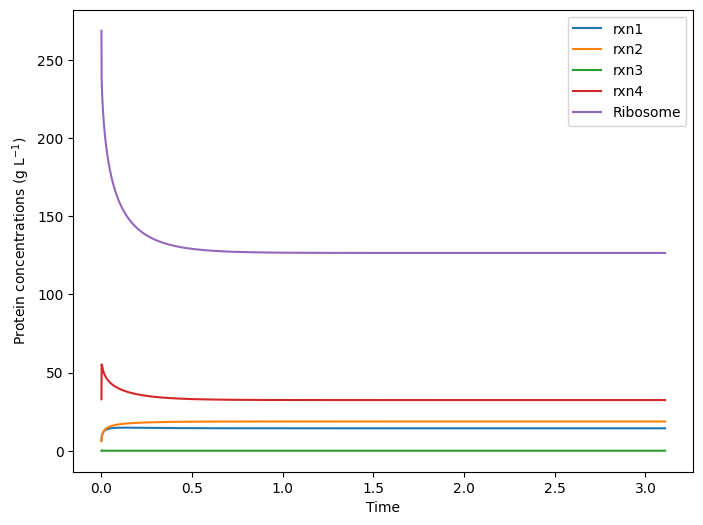

In [11]:
import matplotlib.pyplot as plt
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.gradient_ascent(condition = "1", initial_dt = 0.0001, track = True, savedValues=["p"],label = 1)

# Example data (assuming similar structure for your DataFrame)
DfluxCon1 = model.GA_tracker[["rxn1.p", "rxn2.p", "rxn3.p", "rxn4.p", "Ribosome.p"]]
time = model.GA_tracker["t"]  # 'time' as a single series, not a DataFrame

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each reaction flux against time
for column in DfluxCon1:
    label = column.replace('.p', '')
    plt.plot(time, DfluxCon1[column], label=label)

# Add labels and title
plt.xlabel('Time')
plt.ylabel(r'Protein concentrations (g L$^{-1}$)')
#plt.title('Protein concentrations over time')

# Show a legend
plt.legend()
plt.savefig("GA_Protein-time.png", dpi=300)
# Display the plot
plt.show()

### Gradient Ascent C vs Time

> Gradient ascent: convergence reached (condition=1,	mu=2.2554,	nb iterations=3882,	nb fixed=3857)
     label condition         t      dt        mu       dmu    rxn1.c  \
0        1         1       0.0  0.0001  0.904076       0.0       8.5   
1        1         1    0.0001  0.0001  0.970582  0.066506  7.443848   
2        1         1    0.0002  0.0001  1.022289  0.051706  6.540423   
3        1         1    0.0003  0.0001  1.062355  0.040066  5.780005   
4        1         1    0.0004  0.0001   1.09291  0.030555  5.162412   
...    ...       ...       ...     ...       ...       ...       ...   
3853     1         1  3.108101     0.0  2.255404       0.0  26.35674   
3854     1         1  3.108101     0.0  2.255404       0.0  26.35674   
3855     1         1  3.108101     0.0  2.255404       0.0  26.35674   
3856     1         1  3.108101     0.0  2.255404       0.0  26.35674   
3857     1         1  3.108101     0.0  2.255404       0.0  26.35674   

         rxn2.c     rxn3.c      rxn4

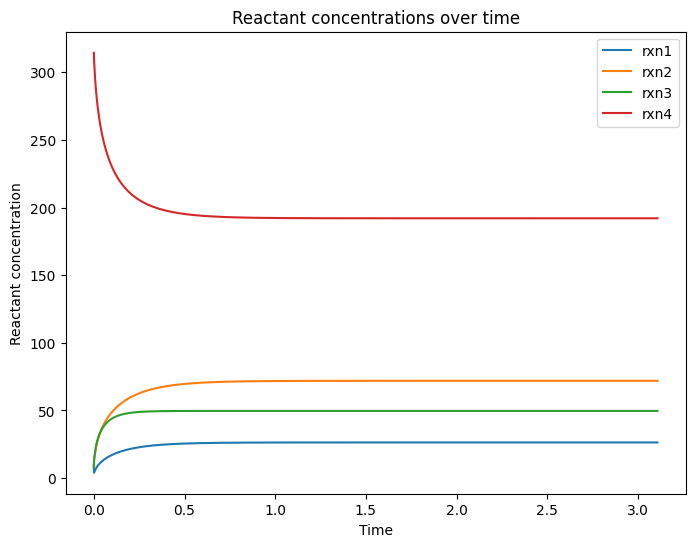

In [43]:
import matplotlib.pyplot as plt
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.gradient_ascent(condition = "1", initial_dt = 0.0001, track = True, savedValues=["c"],label = 1)
print(model.GA_tracker)
print(model.c)
# Example data (assuming similar structure for your DataFrame)
DfluxCon1 = model.GA_tracker[["rxn1.c", "rxn2.c", "rxn3.c", "rxn4.c"]]
time = model.GA_tracker["t"]  # 'time' as a single series, not a DataFrame

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each reaction flux against time
for column in DfluxCon1:
    label = column.replace('.c', '')
    plt.plot(time, DfluxCon1[column], label=label)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Reactant concentration')
plt.title('Reactant concentrations over time')

# Show a legend
plt.legend()

# Display the plot
plt.show()